In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Data Pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 [==============================] - 15s 1us/step


In [5]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# Data Pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# Define Model
model = Sequential([
 Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
 MaxPooling2D(pool_size=(2, 2)),
 Conv2D(64, kernel_size=(3, 3), activation='relu'),
 MaxPooling2D(pool_size=(2, 2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 21s 44ms/step - loss: 0.2245 - accuracy: 0.9341 - val_loss: 0.0675 - val_accuracy: 0.9808
Epoch 2/5
422/422 [==============================] - 18s 43ms/step - loss: 0.0595 - accuracy: 0.9818 - val_loss: 0.0450 - val_accuracy: 0.9877
Epoch 3/5
422/422 [==============================] - 19s 44ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0374 - val_accuracy: 0.9905
Epoch 4/5
422/422 [==============================] - 18s 43ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0464 - val_accuracy: 0.9880
Epoch 5/5
422/422 [==============================] - 18s 43ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0384 - val_accuracy: 0.9895


313/313 [==============================] - 2s 5ms/step


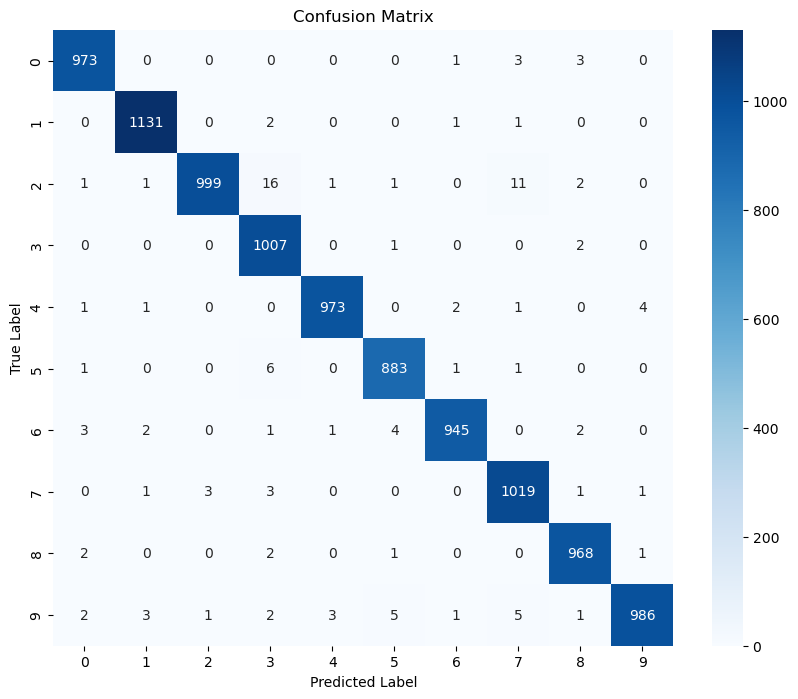

In [11]:
# Evaluate Results using confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), 
yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
